Machine Learning Project:
US Airline Routes and Fares

Seran Gemechu


In [1]:
import numpy as np
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Downloading the Dataset**

In [2]:
# Import the files module from Google Colab
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving US Airline Flight Routes and Fares 1993-2024.csv to US Airline Flight Routes and Fares 1993-2024.csv


# **Loading The Dataset**

In [3]:

df = pd.read_csv('US Airline Flight Routes and Fares 1993-2024.csv')
#Note this results in a warning about 2 columns having mixed types, we will address in data cleaning later


<ipython-input-3-aea896eb6dbe>:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('US Airline Flight Routes and Fares 1993-2024.csv')


In [4]:
#Examining all of the attributes in our dataset and what data types are in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   airport_1       245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  fare            245955 non-null  float64
 14  carrier_lg      244415 non-null  object 
 15  large_ms        244415 non-null  float64
 16  fare_lg         244415 non-null  float64
 17  carrier_lo

# Changing the Column names for better readability

In [5]:
df.columns = ['Table_Ident', 'Year_recorded', 'quarter', 'Origin_CityID', 'Dest_City_ID', 'OriginCityName', 'Dest_Name', 'OriginAirportID', 'Dest_Airport_ID', 'Origin_Airport_Code', 'Dest_AirportCode', 'Dist_between_airports', 'Num_passengers', 'Avg_Fare', 'CodeLargestCarrierPass', 'M_ShareLargestCarrier', 'Avg_FareLargestCarrier', 'CodeLowestFareCarrier', 'M_ShareLowestFareCarrier', 'Lowest_fare', 'Geocodeded_City1', 'Geocoded_City2', 'Unique_ident_route' ]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Table_Ident               245955 non-null  object 
 1   Year_recorded             245955 non-null  int64  
 2   quarter                   245955 non-null  int64  
 3   Origin_CityID             245955 non-null  int64  
 4   Dest_City_ID              245955 non-null  int64  
 5   OriginCityName            245955 non-null  object 
 6   Dest_Name                 245955 non-null  object 
 7   OriginAirportID           245955 non-null  int64  
 8   Dest_Airport_ID           245955 non-null  int64  
 9   Origin_Airport_Code       245955 non-null  object 
 10  Dest_AirportCode          245955 non-null  object 
 11  Dist_between_airports     245955 non-null  int64  
 12  Num_passengers            245955 non-null  int64  
 13  Avg_Fare                  245955 non-null  f

In [7]:
# Select columns 20 and 21 by index, since they have mixed dtypes
columns_to_check = df.iloc[:, [20, 21]]

# We want to examine the first few rows of those two particular columns
print("**************************")
print("Selected Columns:\n", columns_to_check.sample(25))

# Check the data types of the selected columns
print("\n**************************")
print("\nData Types of Selected Columns:\n", columns_to_check.dtypes)

# View unique values in each selected column to understand the contents
print("\n**************************")
for col in columns_to_check.columns:
    print(f"\nUnique values in column {col}:\n", columns_to_check[col].unique())

**************************
Selected Columns:
                                          Geocodeded_City1  \
187496  New York City, NY (Metropolitan Area)\n(40.123...   
236234                                                NaN   
190291            Cincinnati, OH\n(39.104427, -84.513808)   
245815                                                NaN   
11611   Los Angeles, CA (Metropolitan Area)\n(34.05223...   
73557                Memphis, TN\n(35.143378, -90.052136)   
26836   Cleveland, OH (Metropolitan Area)\n(41.505546,...   
12664                Chicago, IL\n(41.775002, -87.696388)   
170905            Cincinnati, OH\n(39.104427, -84.513808)   
138114               Houston, TX\n(29.760803, -95.369506)   
187920                 Boise, ID\n(43.597772, -83.884521)   
139355  Los Angeles, CA (Metropolitan Area)\n(34.05223...   
192940           Jacksonville, FL\n(30.325968, -81.65676)   
98981   Los Angeles, CA (Metropolitan Area)\n(34.05223...   
150252               Chicago, IL\n(41.7

# **Explore and visualize the data to gain insights.**

In [8]:
df.head()

,Table_Ident,Year_recorded,quarter,Origin_CityID,Dest_City_ID,OriginCityName,Dest_Name,OriginAirportID,Dest_Airport_ID,Origin_Airport_Code,...,Avg_Fare,CodeLargestCarrierPass,M_ShareLargestCarrier,Avg_FareLargestCarrier,CodeLowestFareCarrier,M_ShareLowestFareCarrier,Lowest_fare,Geocodeded_City1,Geocoded_City2,Unique_ident_route
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


In [9]:
df.tail()

,Table_Ident,Year_recorded,quarter,Origin_CityID,Dest_City_ID,OriginCityName,Dest_Name,OriginAirportID,Dest_Airport_ID,Origin_Airport_Code,...,Avg_Fare,CodeLargestCarrierPass,M_ShareLargestCarrier,Avg_FareLargestCarrier,CodeLowestFareCarrier,M_ShareLowestFareCarrier,Lowest_fare,Geocodeded_City1,Geocoded_City2,Unique_ident_route
245950,Table1a,2024,1,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,12953,TYS,...,278.70,DL,0.7503,287.44,AA,0.2359,248.46,NaN,NaN,202411541212953TYSLGA
245951,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,11697,TYS,...,148.69,G4,0.8255,114.45,G4,0.8255,114.45,NaN,NaN,202411541211697TYSFLL
245952,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,13303,TYS,...,330.19,AA,0.8057,321.92,AA,0.8057,321.92,NaN,NaN,202411541213303TYSMIA
245953,Table1a,2024,1,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,14112,TYS,...,95.65,G4,1.0000,95.65,G4,1.0000,95.65,NaN,NaN,202411541214112TYSPIE
245954,Table1a,2024,1,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,15304,TYS,...,330.15,AA,0.5212,288.38,AA,0.5212,288.38,NaN,NaN,202411541215304TYSTPA


In [10]:
df.size

5656965

In [11]:
df.shape

(245955, 23)

# **Histogram for each numerical attribute. A histogram shows the number of instances on the vertical axis that have a given value range on the horizontal axis.**

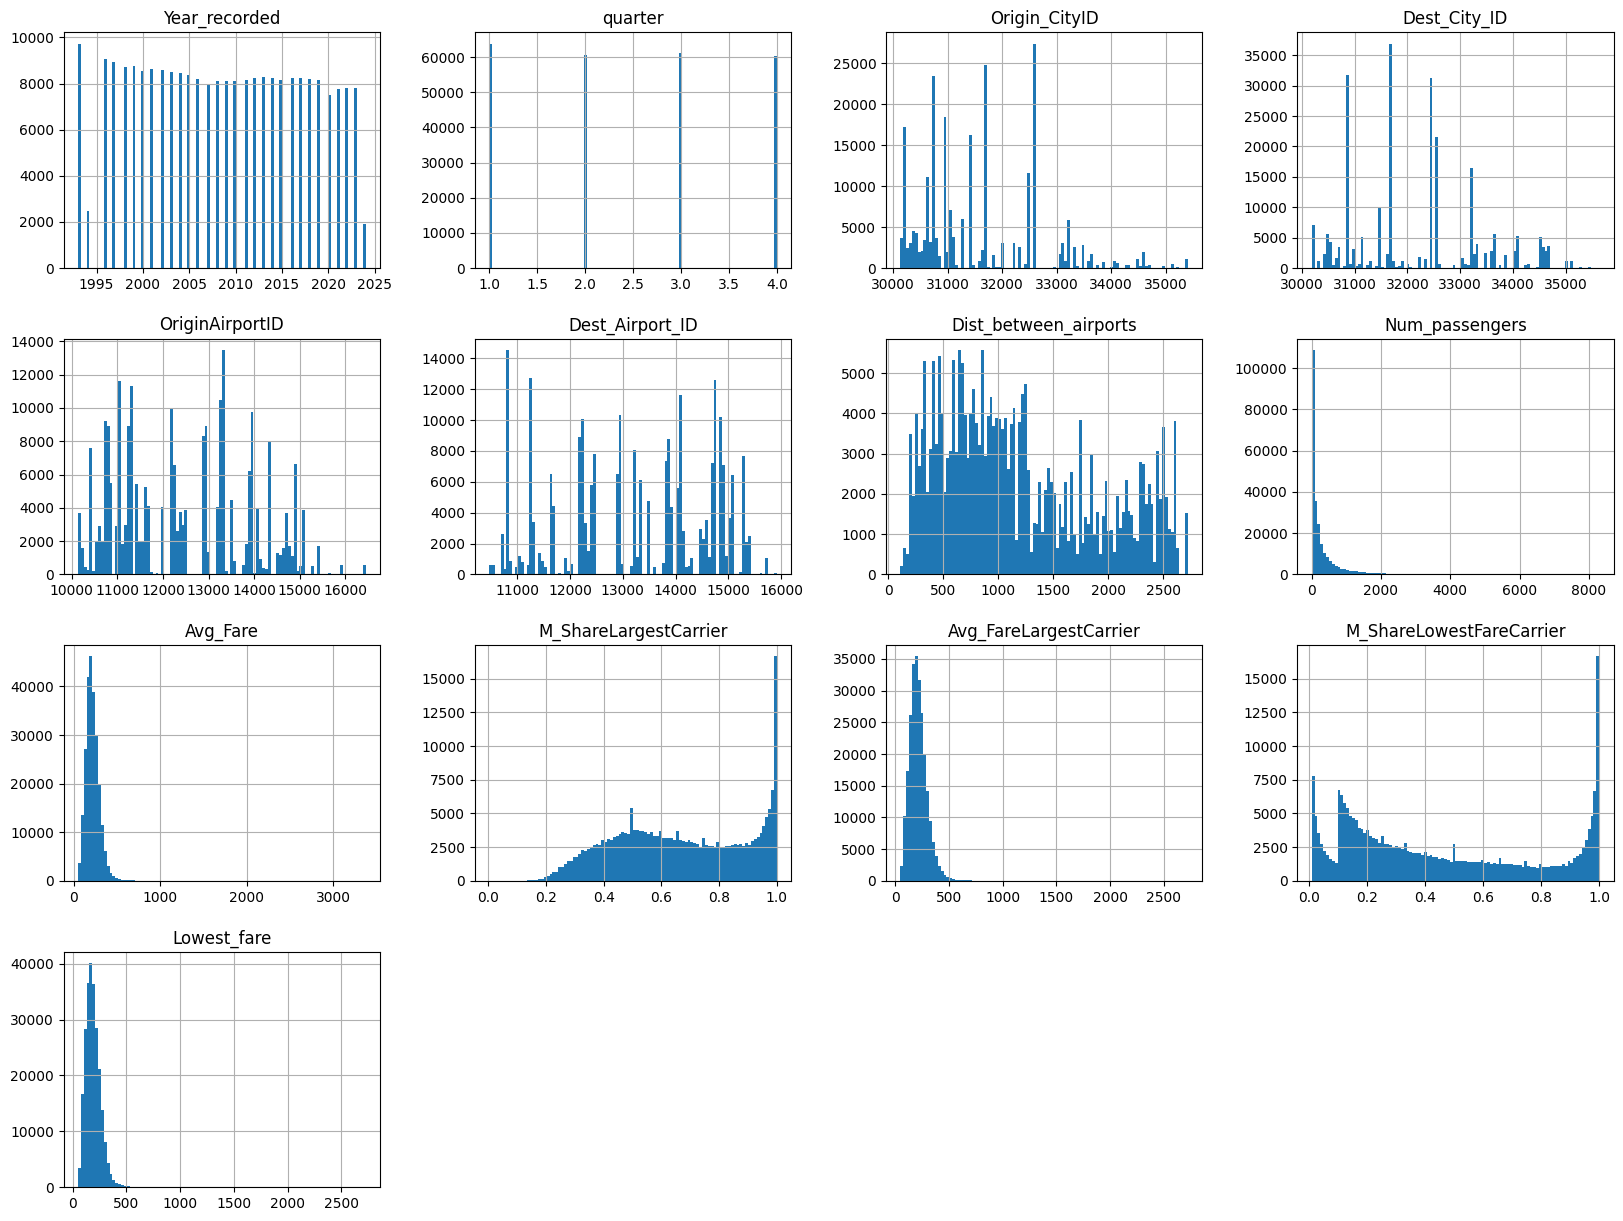

In [12]:
df.hist(bins=100, figsize=(20,15))
plt.show()


# **Feature Engineering**

- Clean data:
- Remove duplicates
- Remove rows with missing columns. Needed labels or features are:
  - (Routes) : Origin_CityID, Dest_City_ID
  - (Volume) : Num_passengers
  - (Average Fare) : Avg_Fare, Avg_FareLargestCarrier, Lowest_fare
  - (Distance) : Dist_between_airports
  - (Market share data) : M_ShareLargestCarrier, M_ShareLowestFareCarrier
  - Year: Year_recorded
  - quarter: Quarter of the year (1-4)
  - Derived target variable: Profitability metric (e.g., (fare * passengers) - operational_cost).


**Count duplicates**

In [13]:
# Count duplicates in the dataset

duplicates = df.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


In [14]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
duplicate_rows


,Table_Ident,Year_recorded,quarter,Origin_CityID,Dest_City_ID,OriginCityName,Dest_Name,OriginAirportID,Dest_Airport_ID,Origin_Airport_Code,...,Avg_Fare,CodeLargestCarrierPass,M_ShareLargestCarrier,Avg_FareLargestCarrier,CodeLowestFareCarrier,M_ShareLowestFareCarrier,Lowest_fare,Geocodeded_City1,Geocoded_City2,Unique_ident_route


In [15]:
# Check for missing values
print("\nMissing values in the dataset:\n")
print(df.isnull().sum())



Missing values in the dataset:

Table_Ident                     0
Year_recorded                   0
quarter                         0
Origin_CityID                   0
Dest_City_ID                    0
OriginCityName                  0
Dest_Name                       0
OriginAirportID                 0
Dest_Airport_ID                 0
Origin_Airport_Code             0
Dest_AirportCode                0
Dist_between_airports           0
Num_passengers                  0
Avg_Fare                        0
CodeLargestCarrierPass       1540
M_ShareLargestCarrier        1540
Avg_FareLargestCarrier       1540
CodeLowestFareCarrier        1612
M_ShareLowestFareCarrier     1612
Lowest_fare                  1612
Geocodeded_City1            39206
Geocoded_City2              39206
Unique_ident_route              0
dtype: int64


In [16]:
# Summary statistics, to further explore the distribution of the data points
print("\nSummary statistics of the dataset:\n")
#The statistical values that have to do with Market Share, Fares, Route Distances and number of passengers
columns_we_want = df.iloc[:, [11,12,13,15,16,18,19]]
print(columns_we_want.describe())



Summary statistics of the dataset:

       Dist_between_airports  Num_passengers       Avg_Fare  \
count          245955.000000   245955.000000  245955.000000   
mean             1189.812319      299.476795     218.979587   
std               703.143472      511.389486      82.372486   
min               109.000000        0.000000      50.000000   
25%               626.000000       21.000000     164.620000   
50%              1023.000000      113.000000     209.320000   
75%              1736.000000      339.000000     262.890000   
max              2724.000000     8301.000000    3377.000000   

       M_ShareLargestCarrier  Avg_FareLargestCarrier  \
count          244415.000000           244415.000000   
mean                0.665252              218.710963   
std                 0.224635               84.674363   
min                 0.003800               50.000000   
25%                 0.480000              161.500000   
50%                 0.652400              208.030000   
75%

**Describe the dataset**

In [17]:
# The describe() method shows a summary of the numerical attributes of all columns here
df.describe()


,Year_recorded,quarter,Origin_CityID,Dest_City_ID,OriginAirportID,Dest_Airport_ID,Dist_between_airports,Num_passengers,Avg_Fare,M_ShareLargestCarrier,Avg_FareLargestCarrier,M_ShareLowestFareCarrier,Lowest_fare
count,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,244415.000000,244415.000000,244343.000000,244343.000000
mean,2008.524124,2.479153,31556.430201,32180.117086,12437.099986,13249.889525,1189.812319,299.476795,218.979587,0.665252,218.710963,0.450438,190.675939
std,8.703364,1.122149,1089.872880,1232.464184,1431.665257,1425.810159,703.143472,511.389486,82.372486,0.224635,84.674363,0.332669,73.577694
min,1993.000000,1.000000,30135.000000,30189.000000,10135.000000,10466.000000,109.000000,0.000000,50.000000,0.003800,50.000000,0.010000,50.000000
25%,2001.000000,1.000000,30721.000000,30994.000000,11193.000000,12197.000000,626.000000,21.000000,164.620000,0.480000,161.500000,0.158000,140.060000
50%,2008.000000,2.000000,31423.000000,32211.000000,12266.000000,13303.000000,1023.000000,113.000000,209.320000,0.652400,208.030000,0.360000,181.630000
75%,2016.000000,3.000000,32467.000000,33192.000000,13487.000000,14679.000000,1736.000000,339.000000,262.890000,0.871900,263.640000,0.750000,230.040000
max,2024.000000,4.000000,35412.000000,35628.000000,16440.000000,15919.000000,2724.000000,8301.000000,3377.000000,1.000000,2725.600000,1.000000,2725.600000


**Categories**

In [18]:
df['OriginCityName'].value_counts()

,count
OriginCityName,
"Los Angeles, CA (Metropolitan Area)",26055
"Boston, MA (Metropolitan Area)",23433
"New York City, NY (Metropolitan Area)",23175
"Chicago, IL",18430
"Dallas/Fort Worth, TX",14905
...,...
"Sioux Falls, SD",2
"Ashland, WV",2
"Fort Collins/Loveland, CO",1


**Visualize Missing Values**

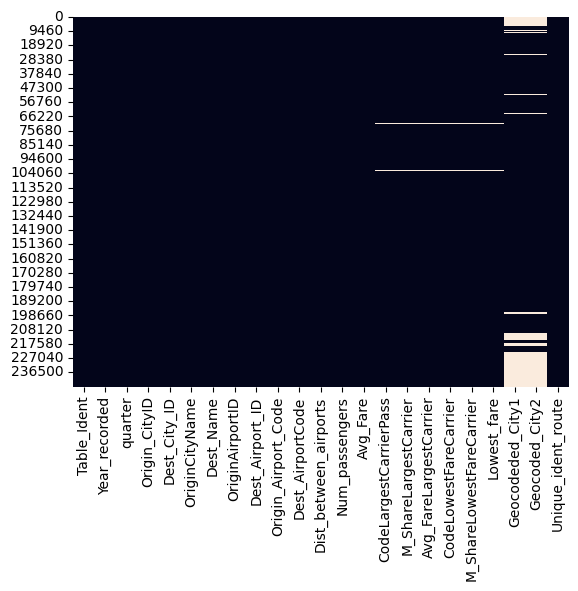

In [19]:

# Visualize missing data using a heatmap
sns.heatmap(df.isnull(), cbar=False)
plt.show()

# **Cleaning the Dataset**

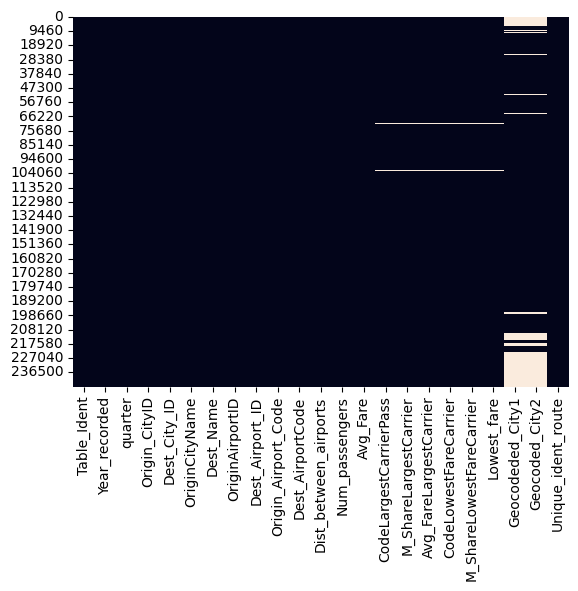

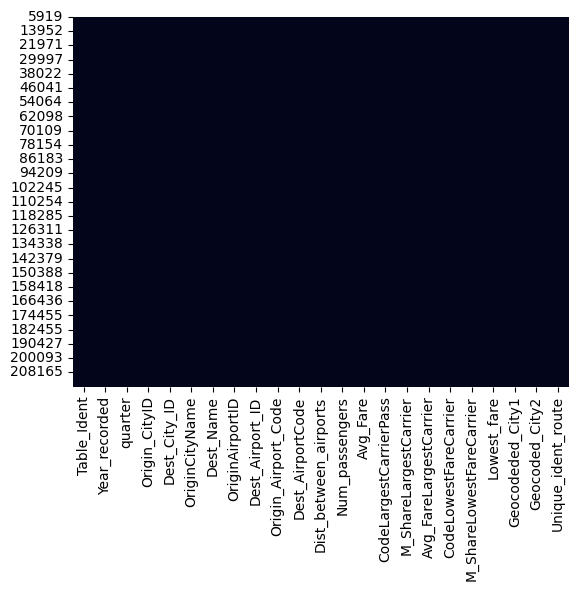

In [20]:

# Visualize missing data using a heatmap
sns.heatmap(df.isnull(), cbar=False)
plt.show()

# Drop rows with any missing values
df_cleaned = df.dropna()

# Drop columns with any missing values
df_cleaned_columns = df.dropna(axis=1)
df_cleaned.shape
df_cleaned_columns.shape
sns.heatmap(df_cleaned.isnull(), cbar=False)
plt.show()

In [21]:
df_cleaned.shape
df_cleaned_columns.shape

(245955, 15)

# **Visualize the Cleaned Data, make inferences**

## Visualize the top origin and destination cities by the number of passengers.

<ipython-input-22-0d154b953050>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_origin_cities.values, y=top_origin_cities.index, palette='viridis')


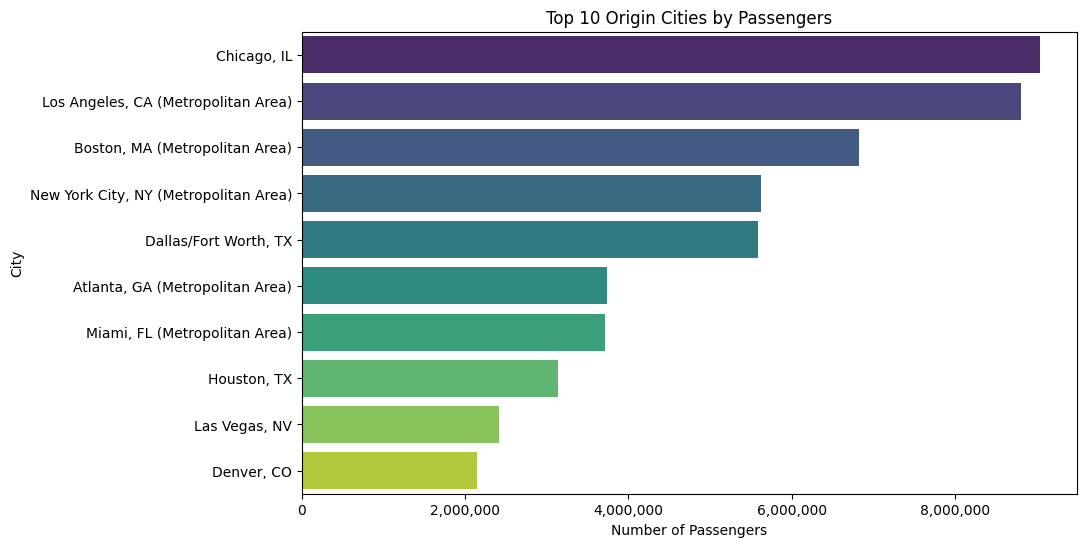

<ipython-input-22-0d154b953050>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_origin_cities.values, y=top_origin_cities.index, palette='viridis')


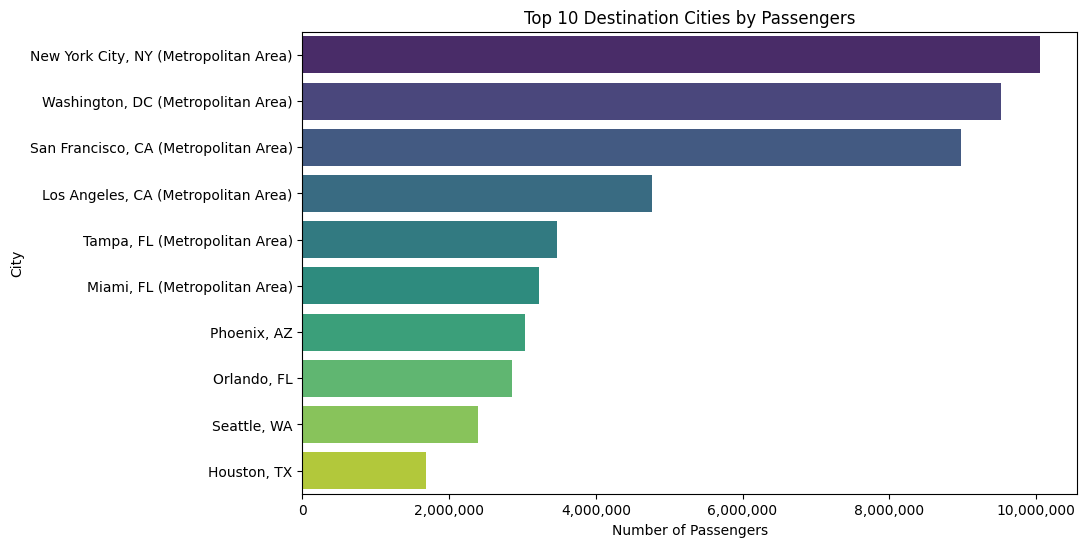

'There are some obvious outcomes here as the more populous a city the more departures and arrivals'

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Format function to use comma separator
def thousands_formatter(x, pos):
    return f'{int(x):,}'

# Plotting
top_origin_cities = df.groupby('OriginCityName')['Num_passengers'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_origin_cities.values, y=top_origin_cities.index, palette='viridis')

# Apply the thousands formatter to the x-axis
ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.title('Top 10 Origin Cities by Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('City')
plt.show()

# Plotting
top_origin_cities = df.groupby('Dest_Name')['Num_passengers'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_origin_cities.values, y=top_origin_cities.index, palette='viridis')

# Apply the thousands formatter to the x-axis
ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.title('Top 10 Destination Cities by Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('City')
plt.show()

"""There are some obvious outcomes here as the more populous a city the more departures and arrivals"""

# Understand the distribution of fares and distances between airports.

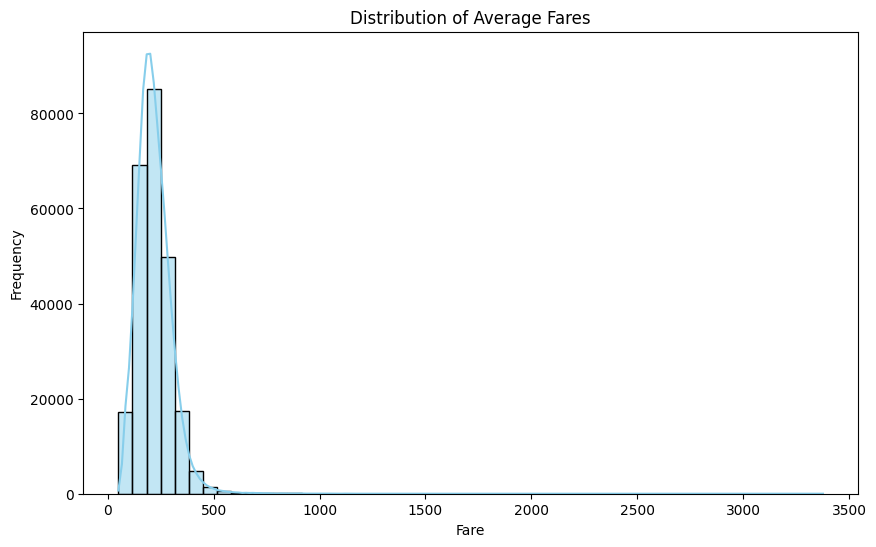

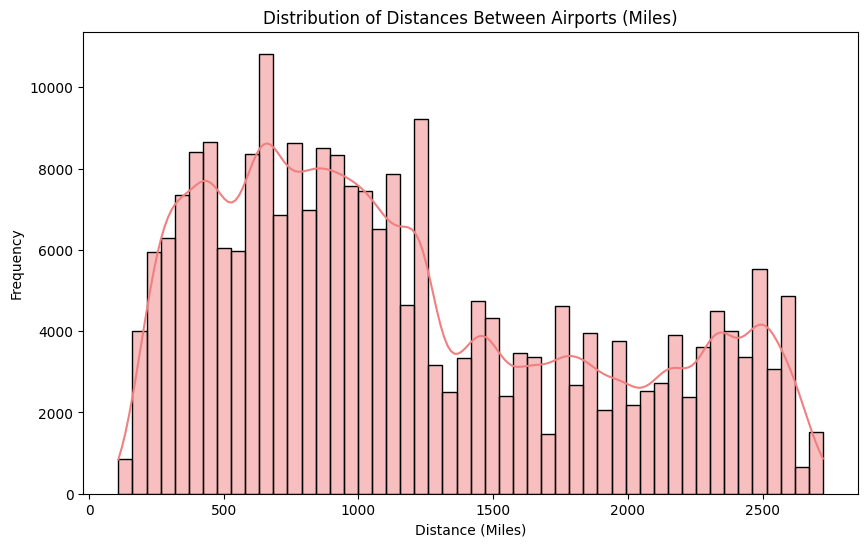

In [23]:
# Fare Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Avg_Fare'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Average Fares')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Distance Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Dist_between_airports'], bins=50, kde=True, color='lightcoral')
plt.title('Distribution of Distances Between Airports (Miles)')
plt.xlabel('Distance (Miles)')
plt.ylabel('Frequency')
plt.show()

#We see a pretty tight distribution of likely fares, indicating strong market competition
#Interestingly distance between flights seems bimodal but mostly within 500-1000 miles or 2200-2500 miles


# Correlation between Numerical Features of Dataset

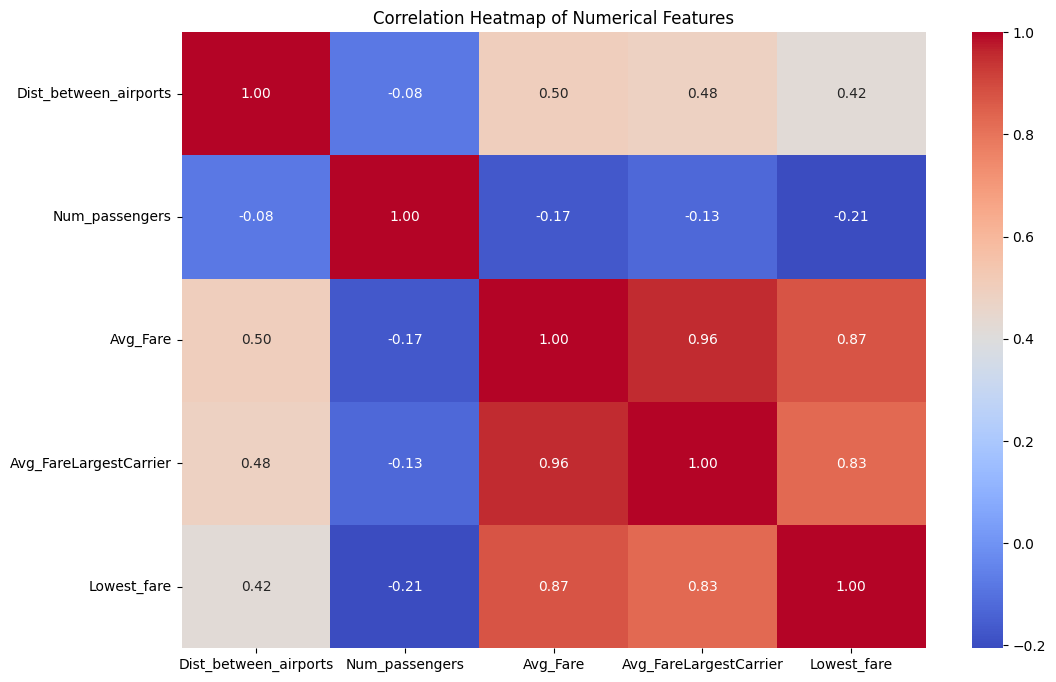

' Findings of the heatmap indicate: \n1. Largest carrier has the largest influence on the average fare and the lowest fare\nThis seems obvious as it will have more datapoints to sway any correlations towards it.\n2. The Avg fare is moderately correlated with distance of travel, longer flights tend to be more expensive\n3. Distance between airports has no correlation to number of passengers, interesting.\n4. Number of passengers has slightly negative correlation with lowest fare, indicating market competition between\ncarriers. Seems counter intuitive, but more people flying may force airlines to compete.\nWe also see this correlation on avg fare as well.\n\n'

In [24]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df[['Dist_between_airports', 'Num_passengers', 'Avg_Fare', 'Avg_FareLargestCarrier', 'Lowest_fare']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

#note the diagonal red as a 100% correlation between the same attributes
#Negative correlations indicate when one goes up the other goes down (more blue)
#Positive correlation indicates when one goes up so does the other (more red)

""" Findings of the heatmap indicate:
1. Largest carrier has the largest influence on the average fare and the lowest fare
This seems obvious as it will have more datapoints to sway any correlations towards it.
2. The Avg fare is moderately correlated with distance of travel, longer flights tend to be more expensive
3. Distance between airports has no correlation to number of passengers, interesting.
4. Number of passengers has slightly negative correlation with lowest fare, indicating market competition between
carriers. Seems counter intuitive, but more people flying may force airlines to compete.
We also see this correlation on avg fare as well.

"""

# Top 20 Cities with Highest Average Fares when flying out

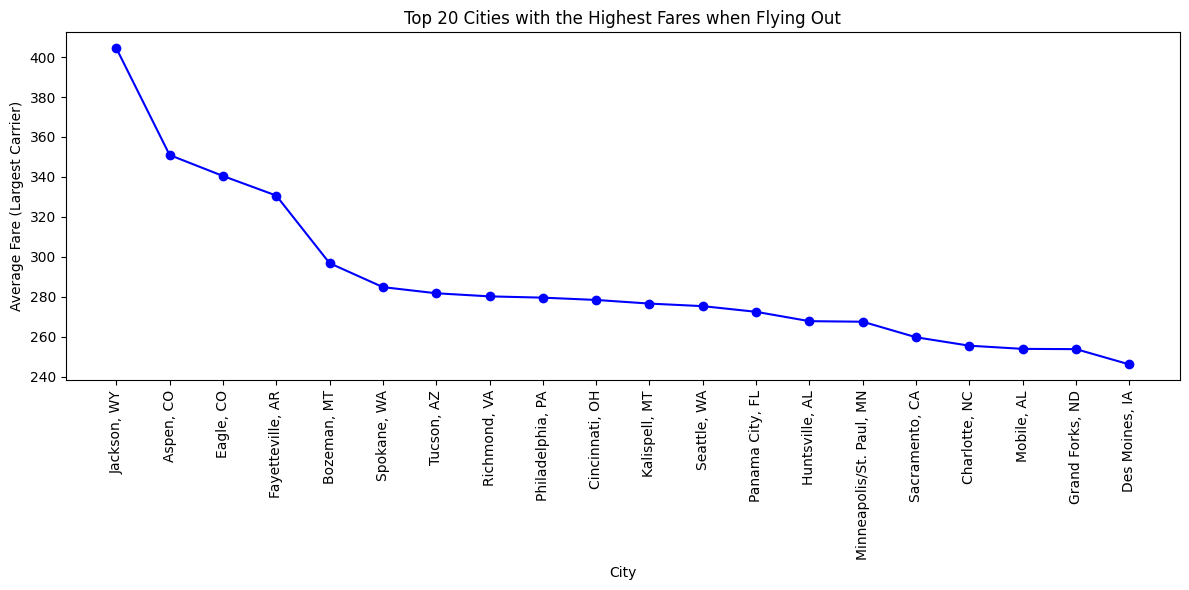

"Interesting to note that the cities with the most departures and arrivals didn't have the highest average fares\nIn fact it appears the less departures and arrivals that a city has the higher average fare based on our first graphic above\n"

In [25]:
# Step 1: Calculate average fare for each city
average_fare_by_city = df_cleaned.groupby('OriginCityName')['Avg_FareLargestCarrier'].mean().reset_index()

# Step 2: Sort the cities by average fare in descending order and select the top 20
top_20_cities = average_fare_by_city.sort_values(by='Avg_FareLargestCarrier', ascending=False).head(20)

# Step 3: Plot the top 20 cities
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.plot(top_20_cities['OriginCityName'], top_20_cities['Avg_FareLargestCarrier'], marker='o', color='b')  # Line plot with markers
plt.xlabel('City')
plt.ylabel('Average Fare (Largest Carrier)')
plt.title('Top 20 Cities with the Highest Fares when Flying Out')
plt.tight_layout()  # Prevents labels from overlapping
plt.show()

"""Interesting to note that the cities with the most departures and arrivals didn't have the highest average fares
In fact it appears the less departures and arrivals that a city has the higher average fare based on our first graphic above
"""

# **XG BOOST**
We want to predict profitability based on known factors and determine which features are most important in predicting profitability

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:08:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4347
           1       1.00      1.00      1.00     44522

    accuracy                           1.00     48869
   macro avg       0.99      1.00      0.99     48869
weighted avg       1.00      1.00      1.00     48869

Confusion Matrix:
[[ 4342     5]
 [  111 44411]]


<Figure size 1000x800 with 0 Axes>

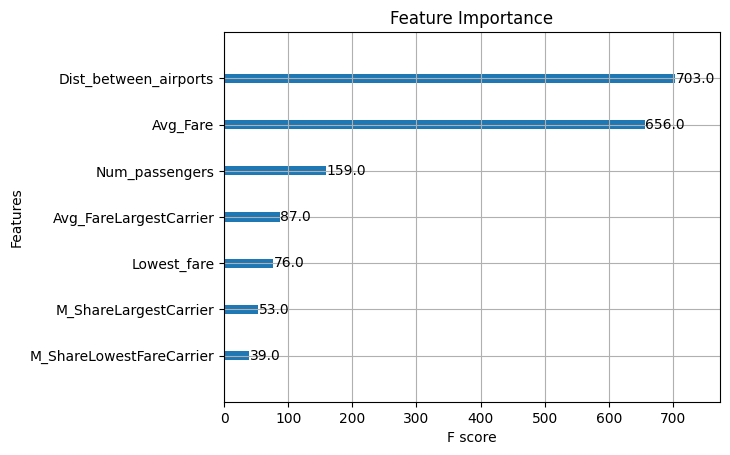

' Our Target varible is profitability, and predicting it using the model above\n1. Our confusion matrix shows a high accuracy in predicting true positive and negatives\n2. Our Feature importance shows that Dist between airports and Avg Fare had the highest contributions\nto predicting our target variable.\n'

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


# Step 2: Data Preprocessing
# a. Handle missing values
crucial_columns = [
    'Origin_CityID', 'Dest_City_ID', 'Num_passengers', 'Avg_Fare', 'Avg_FareLargestCarrier', 'Lowest_fare',
     'Dist_between_airports', 'M_ShareLargestCarrier', 'M_ShareLowestFareCarrier'
]
#Removes rows with missing values in any of the specified columns above
df = df.dropna(subset=crucial_columns)

# b. Remove duplicate rows from our dataframe
df = df.drop_duplicates()

# c. Create New Features to help analyze cost and profit
df['revenue'] = df['Avg_Fare'] * df['Num_passengers']
df['estimated_cost'] = df['Dist_between_airports'] * 0.1 * df['Num_passengers']  # Placeholder estimation
df['profit'] = df['revenue'] - df['estimated_cost']
df['profitability'] = df['profit'].apply(lambda x: 1 if x > 0 else 0)

# d. Encode categorical variables
# categorical_cols = ['carrier_lg', 'carrier_low']
# df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 3: Define features and target variable
feature_cols = [
    'Num_passengers', 'Avg_Fare', 'Avg_FareLargestCarrier', 'Lowest_fare', 'Dist_between_airports',
    'M_ShareLargestCarrier', 'M_ShareLowestFareCarrier'
] + [col for col in df.columns if col.startswith('carrier_lg_') or col.startswith('carrier_low_')]

X = df[feature_cols]
y = df['profitability']

# Step 4: Split the data into training and testing sets using 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 5: Handle class imbalance
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)

# Step 6: Train the XGBoost model
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight
)
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
#Calculate the percentage of correctly classified instances
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

#Shows the counts of true positives/negatives and false positives/negatives
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 8: Plot feature importance in determining the target variable
plt.figure(figsize=(10, 8))
plot_importance(model)
plt.title('Feature Importance')
plt.show()

""" Our Target varible is profitability, and predicting it using the model above
1. Our confusion matrix shows a high accuracy in predicting true positive and negatives
2. Our Feature importance shows that Dist between airports and Avg Fare had the highest contributions
to predicting our target variable.
"""

# Visualizing the Most profitable and least profitable cities

In [27]:
# Calculate total profit for each city
profit_by_city = df.groupby('OriginCityName')['profit'].sum().reset_index()
profit_by_city = profit_by_city.sort_values(by='profit', ascending=False)

<ipython-input-28-2cc8518da00d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='profit', y='OriginCityName', data=top_10_profitable, palette='viridis')


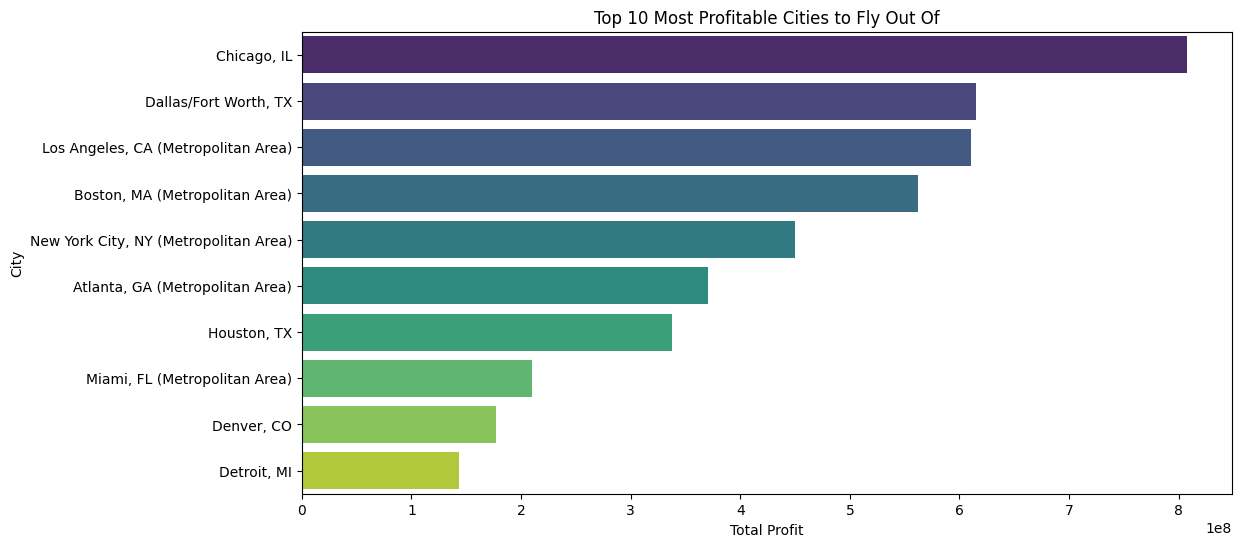

<ipython-input-28-2cc8518da00d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='profit', y='OriginCityName', data=bottom_10_profitable, palette='magma')


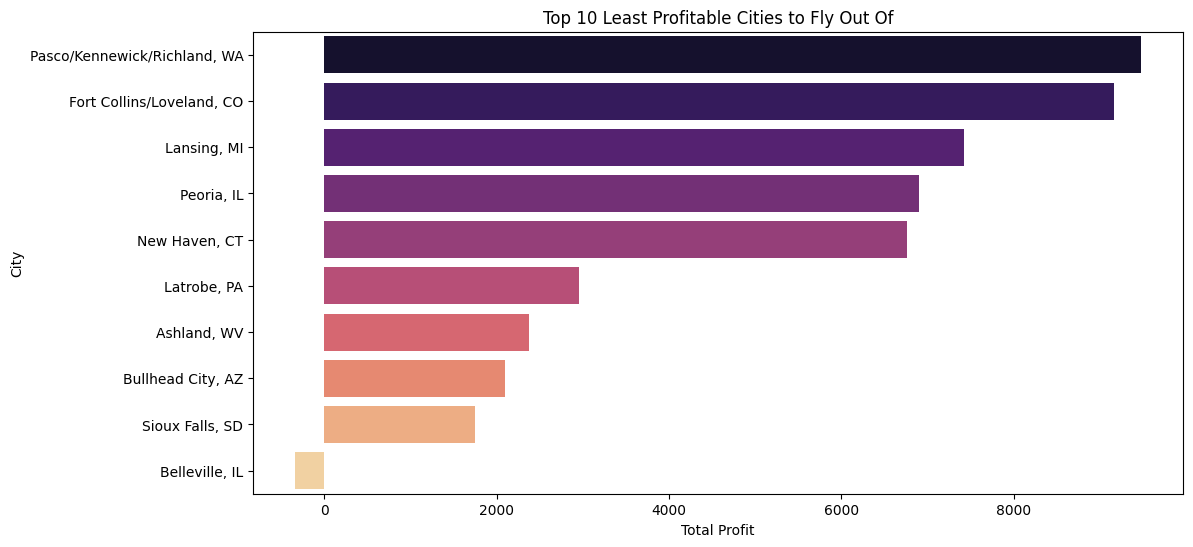

'Findings:\n1. It seems like the most populous cities with the highest number of departures or arrivals also seem to be the most\nprofitable. \n2. Similarly the cities with the least departures or arrivals also seem to be the least profitable.\n\n'

In [28]:
# Top 10 most profitable cities
top_10_profitable = profit_by_city.head(10)

# Top 10 least profitable cities
bottom_10_profitable = profit_by_city.tail(10)

# Visualization for Top 10 Most Profitable Cities
plt.figure(figsize=(12, 6))
sns.barplot(x='profit', y='OriginCityName', data=top_10_profitable, palette='viridis')
plt.title('Top 10 Most Profitable Cities to Fly Out Of')
plt.xlabel('Total Profit')
plt.ylabel('City')
plt.show()

# Visualization for Top 10 Least Profitable Cities
plt.figure(figsize=(12, 6))
sns.barplot(x='profit', y='OriginCityName', data=bottom_10_profitable, palette='magma')
plt.title('Top 10 Least Profitable Cities to Fly Out Of')
plt.xlabel('Total Profit')
plt.ylabel('City')
plt.show()

"""Findings:
1. It seems like the most populous cities with the highest number of departures or arrivals also seem to be the most
profitable.
2. Similarly the cities with the least departures or arrivals also seem to be the least profitable.

"""

# Visualizing The total number of departures and arrivals correlation with  Profitability

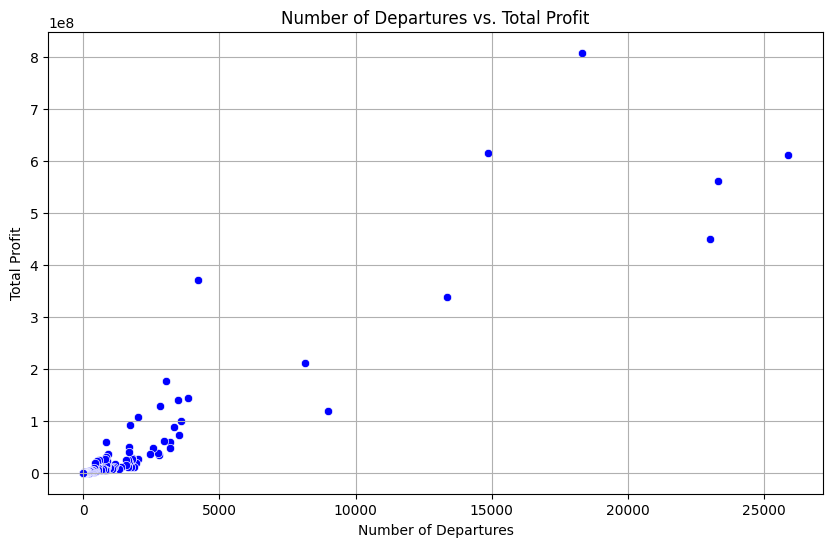

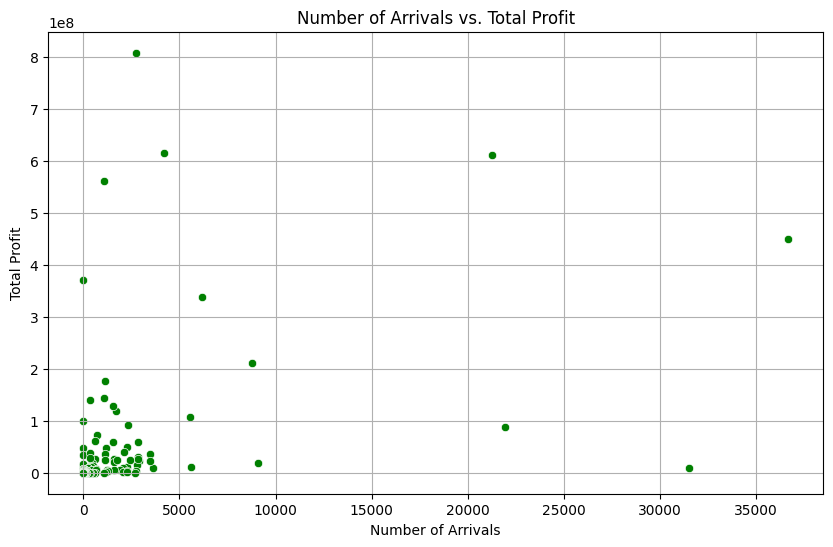

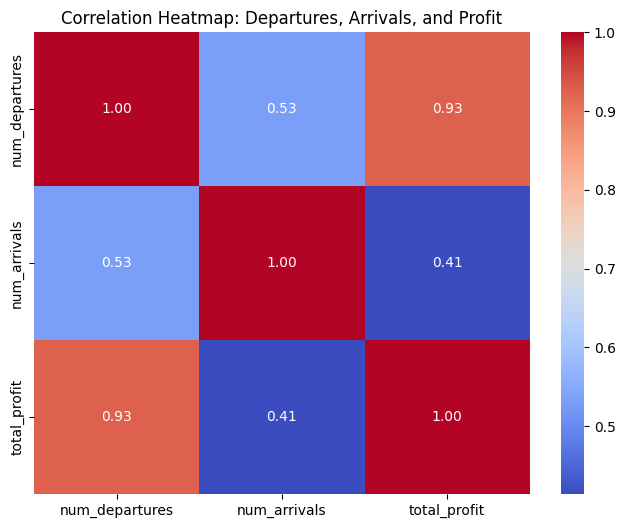

'Findings:\n1. From the 2 scatter plots below we see that as departures and arrivals increase so does profit\n2. The correlation heatmap that the number of departures is very highly correlated with higher profit\nAs departures go up, profit goes up almost by the same factor\n3. The number of arrivals is somewhat correlated with higher profit, but not as much as departures\nHowever, it is still the case that as departures increase so does profit.\n4. The number of departures and the number of arrivals are somewhat correlated. This makes sense because\nhigh traffic airports should have a similar number of departures and arrivals.\n'

In [29]:
# Number of departures for each city
departures = df['OriginCityName'].value_counts().reset_index()
departures.columns = ['city', 'num_departures']

# Number of arrivals for each city
arrivals = df['Dest_Name'].value_counts().reset_index()
arrivals.columns = ['city', 'num_arrivals']

# Total profitability for each city (from OriginCityName perspective)
profit_by_city = df.groupby('OriginCityName')['profit'].sum().reset_index()
profit_by_city.columns = ['city', 'total_profit']

# Merge departures, arrivals, and profitability into a single DataFrame
city_profitability = pd.merge(departures, arrivals, on='city', how='outer')
city_profitability = pd.merge(city_profitability, profit_by_city, on='city', how='left')

# Fill missing values with 0 (for cities with no departures or arrivals)
city_profitability.fillna(0, inplace=True)

# Scatter plot: Number of departures vs. total profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_departures', y='total_profit', data=city_profitability, color='blue')
plt.title('Number of Departures vs. Total Profit')
plt.xlabel('Number of Departures')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

# Scatter plot: Number of arrivals vs. total profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_arrivals', y='total_profit', data=city_profitability, color='green')
plt.title('Number of Arrivals vs. Total Profit')
plt.xlabel('Number of Arrivals')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
corr = city_profitability[['num_departures', 'num_arrivals', 'total_profit']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Departures, Arrivals, and Profit')
plt.show()

"""Findings:
1. From the 2 scatter plots below we see that as departures and arrivals increase so does profit
2. The correlation heatmap that the number of departures is very highly correlated with higher profit
As departures go up, profit goes up almost by the same factor
3. The number of arrivals is somewhat correlated with higher profit, but not as much as departures
However, it is still the case that as departures increase so does profit.
4. The number of departures and the number of arrivals are somewhat correlated. This makes sense because
high traffic airports should have a similar number of departures and arrivals.
"""

# This part is still in progress...

In [30]:

print(df.size)
print(f"Length of X_train: {len(X_train)}")
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of y_test: {len(y_test)}")


6597261
Length of X_train: 195474
Length of X_test: 48869
Length of y_train: 195474
Length of y_test: 48869


# **AI Model**

- Evaluation Metrics
- Classification Metrics:

Accuracy: Proportion of correctly predicted instances.
Precision: Accuracy of positive predictions.
Recall: Ability of the model to find all positive instances.
F1 Score: Harmonic mean of precision and recall.

- Regression Metrics:

Mean Absolute Error (MAE)
Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
R-squared Score

# **LOGISTIC REGRESSION**

# **Creating a Test Set**

In [31]:
from zlib import crc32
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import google.colab.drive as drive


# **CUSTOM FUNCTIONS FOR CREATING TEST AND TRAIN SETS**

In [32]:
'''
Compute a hash of each instance’s identifier and put that instance in the test set if the
hash is lower than or equal to 20% of the maximum hash value. This ensures that the
test set will remain consistent across multiple runs, even if you refresh the dataset.
The new test set will contain 20% of the new instances, but it will not contain any
instance that was previously in the training set.
'''

def test_set_check(identifier, test_ratio):
 return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [33]:
def split_train_test_by_id(df, test_ratio, id_column):
 ids = df[id_column]
 in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
 return df.loc[~in_test_set], df.loc[in_test_set]


In [34]:
df_with_id = df.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "index")


# **USING SCIKIT-LEARN : TEST AND TRAIN SETS**

In [35]:
sci_train_set, sci_test_set = train_test_split(df_cleaned, test_size=0.2, random_state=42)

In [36]:
sci_train_set.size
sci_train_set.shape

(164151, 23)

In [37]:
sci_test_set.size
sci_test_set.shape

(41038, 23)